<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
</p></center>

<h1><center><font size=10>Student-Shubin Zhai's Homework</center></font></h1>
<h1><center>EasyVisa Homework Week of Feb.27</center></h1>

## Problem Statement

### Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries

In [3]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.5.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 
!pip install xgboost==2.0.3
!pip install --force-reinstall imblearn=0.
!pip install --force-reinsall imbalanced-learn


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
ERROR: Invalid requirement: 'imblearn=0.'
Hint: = is not a valid operator. Did you mean == ?

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --force-reinsall


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

In [4]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

## Import Dataset

In [5]:
data = pd.read_csv("EasyVisa.csv")

## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [6]:
data.head(5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.203,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.650,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.860,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.030,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.390,Year,Y,Certified


#### Understand the shape of the dataset

In [7]:
data.shape

(25480, 12)

#### Check the data types of the columns for the dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


## Exploratory Data Analysis (EDA)

#### Let's check the statistical summary of the data

In [9]:
data.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000,25480.000,25480.000
mean,5667.043,1979.410,74455.815
std,22877.929,42.367,52815.942
min,-26.000,1800.000,2.137
25%,1022.000,1976.000,34015.480
50%,2109.000,1997.000,70308.210
75%,3504.000,2005.000,107735.513
max,602069.000,2016.000,319210.270


#### Fixing the negative values in number of employees columns

In [10]:
data[data["no_of_employees"]<0].count()

case_id                  33
continent                33
education_of_employee    33
has_job_experience       33
requires_job_training    33
no_of_employees          33
yr_of_estab              33
region_of_employment     33
prevailing_wage          33
unit_of_wage             33
full_time_position       33
case_status              33
dtype: int64

In [11]:
data['no_of_employees']=abs(data['no_of_employees'])
data[data["no_of_employees"]<0]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status


#### Let's check the count of each unique category in each of the categorical variables

In [12]:
#Drop the case_id as it is not needed
data.drop("case_id", axis=1, inplace=True)

In [13]:
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.203,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.650,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.860,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.030,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.390,Year,Y,Certified


In [14]:
unique_values = data.select_dtypes(include=['object', 'category']).agg(lambda x: list(x.unique()))
unique_values

continent                [Asia, Africa, North America, Europe, South Am...
education_of_employee       [High School, Master's, Bachelor's, Doctorate]
has_job_experience                                                  [N, Y]
requires_job_training                                               [N, Y]
region_of_employment             [West, Northeast, South, Midwest, Island]
unit_of_wage                                     [Hour, Year, Week, Month]
full_time_position                                                  [Y, N]
case_status                                            [Denied, Certified]
dtype: object

### Univariate Analysis

In [15]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [16]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on education of employee

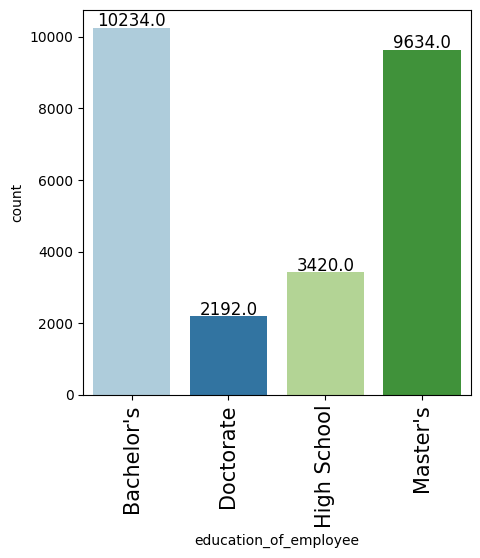

In [17]:
labeled_barplot(data, "education_of_employee")  

#### Observations on region of employment

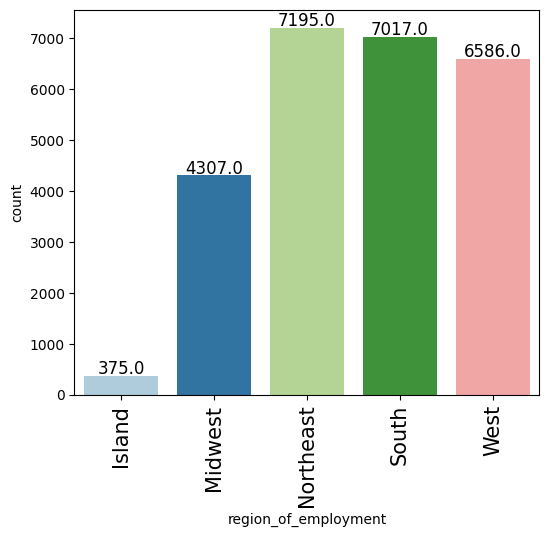

In [18]:
labeled_barplot(data, "region_of_employment")

#### Observations on job experience

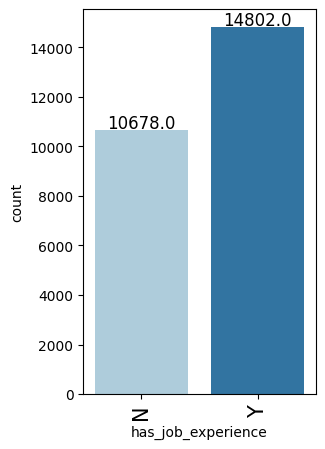

In [19]:
labeled_barplot(data, "has_job_experience")

#### Observations on case status

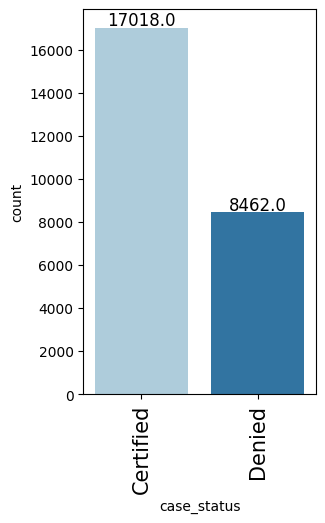

In [20]:
labeled_barplot(data, "case_status")

### Bivariate Analysis

**Creating functions that will help us with further analysis.**

In [21]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [22]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification

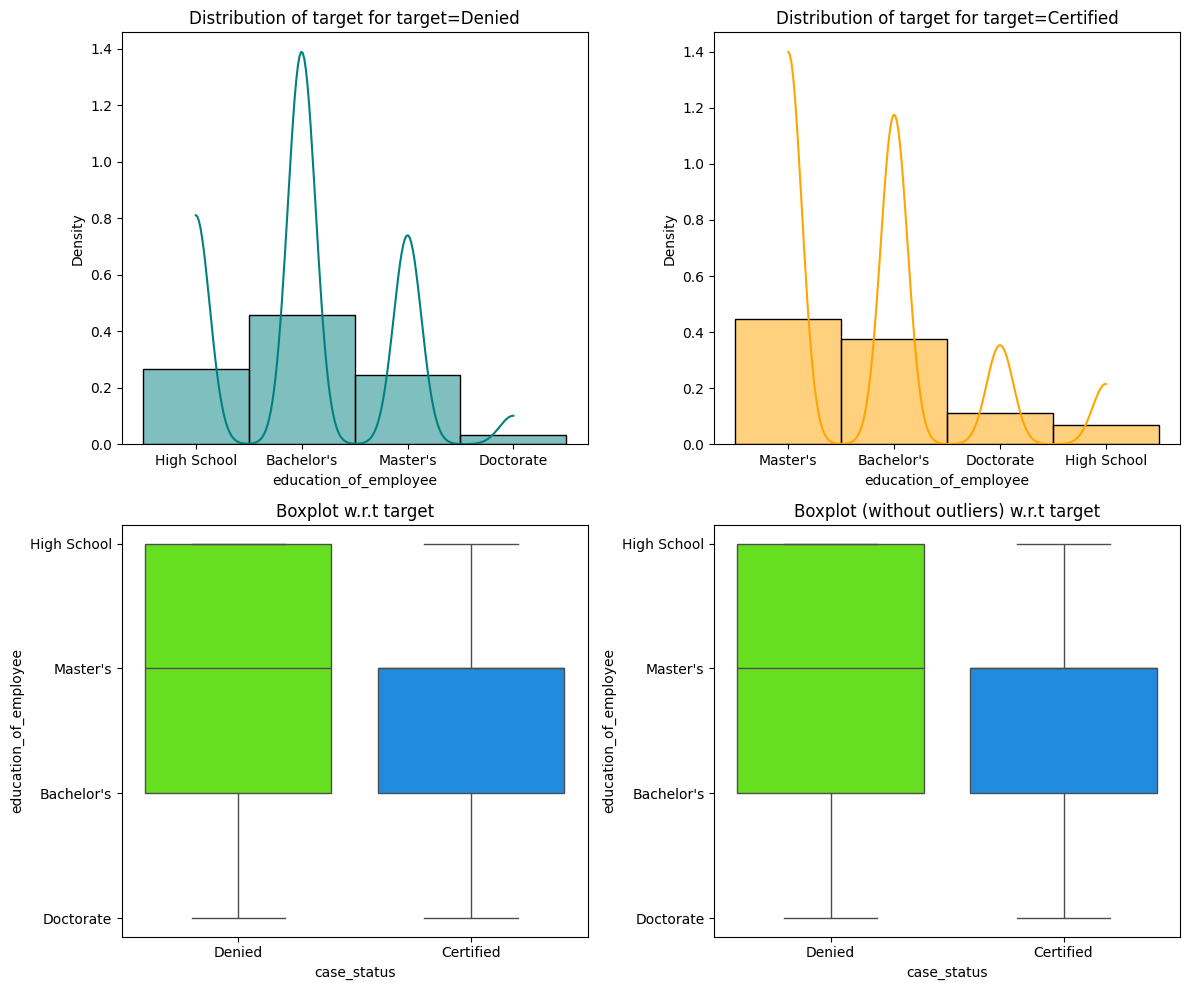

In [23]:
distribution_plot_wrt_target(data, "education_of_employee", "case_status")

#### Lets' similarly check for the continents and find out how the visa status vary across different continents.

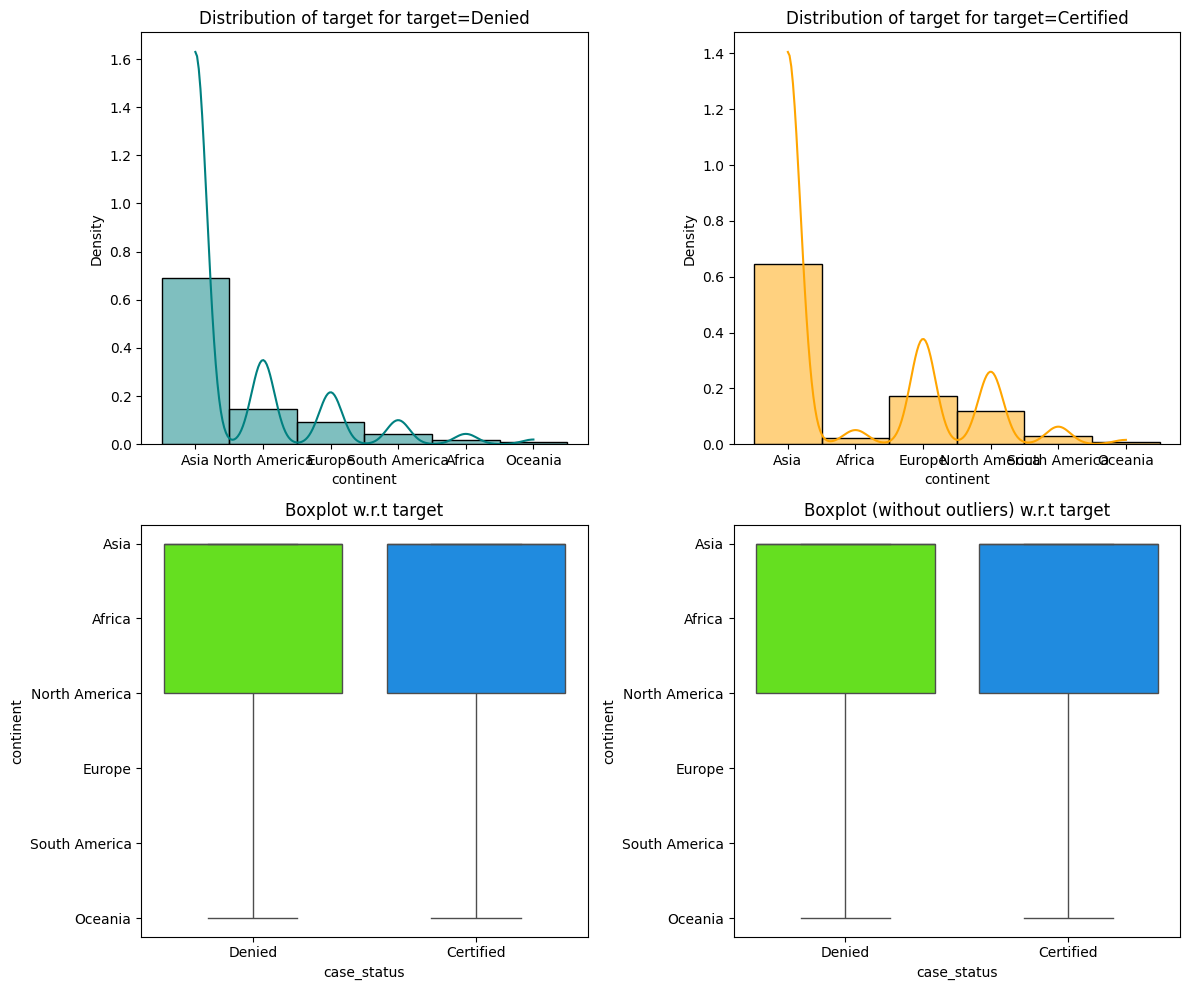

In [24]:
distribution_plot_wrt_target(data, "continent", "case_status")

#### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


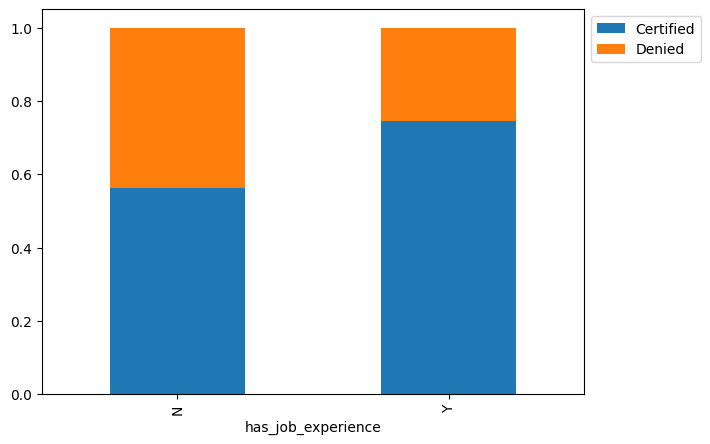

In [25]:
stacked_barplot(data, "has_job_experience", "case_status")

#### Checking if the prevailing wage is similar across all the regions of the US

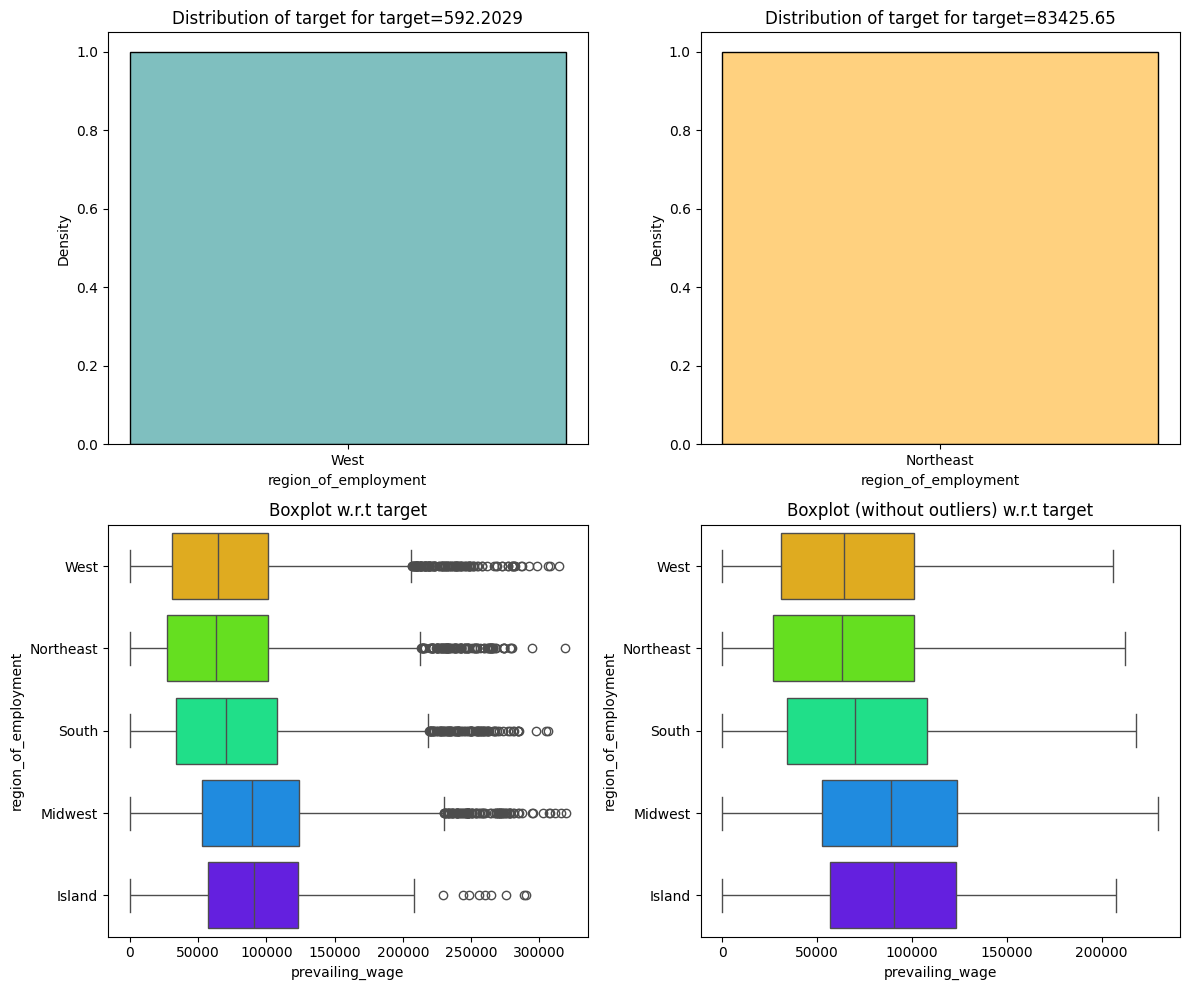

In [26]:
distribution_plot_wrt_target(data, "region_of_employment", "prevailing_wage")

#### The US government has established a prevailing wage to protect local talent and foreign workers. Let's analyze the data and see if the visa status changes with the prevailing wage

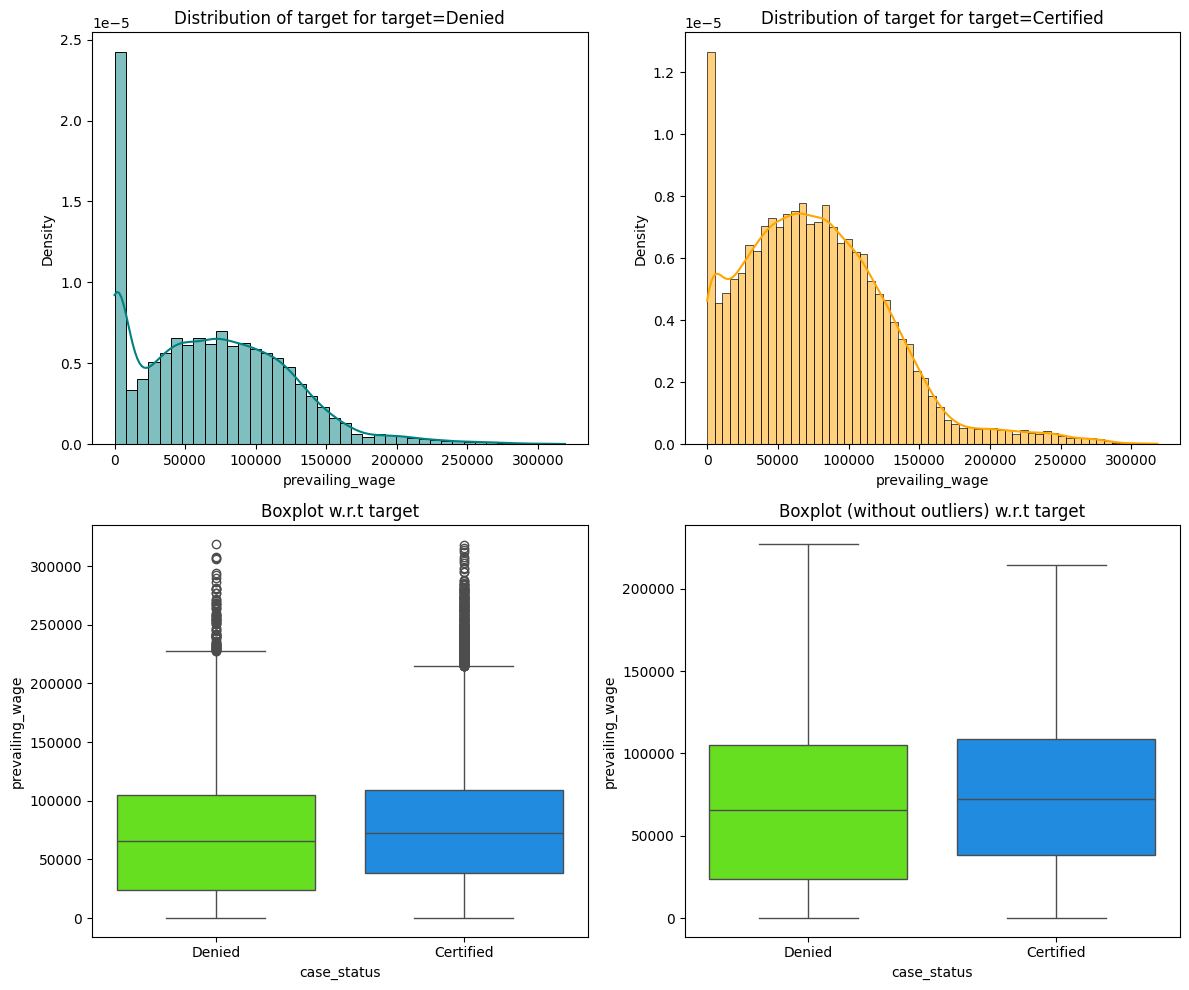

In [27]:
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")

#### The prevailing wage has different units (Hourly, Weekly, etc). Let's find out if it has any impact on visa applications getting certified.

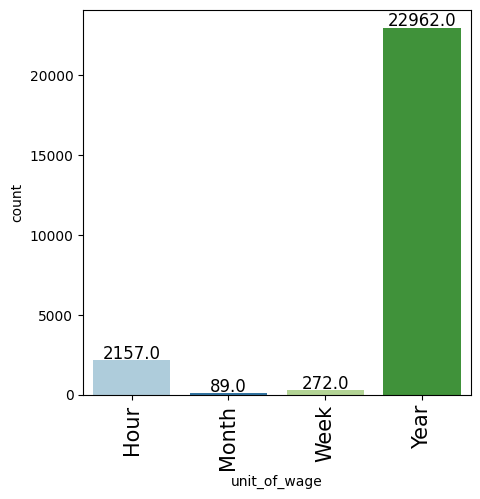

In [28]:
labeled_barplot(data, "unit_of_wage", "case_status")

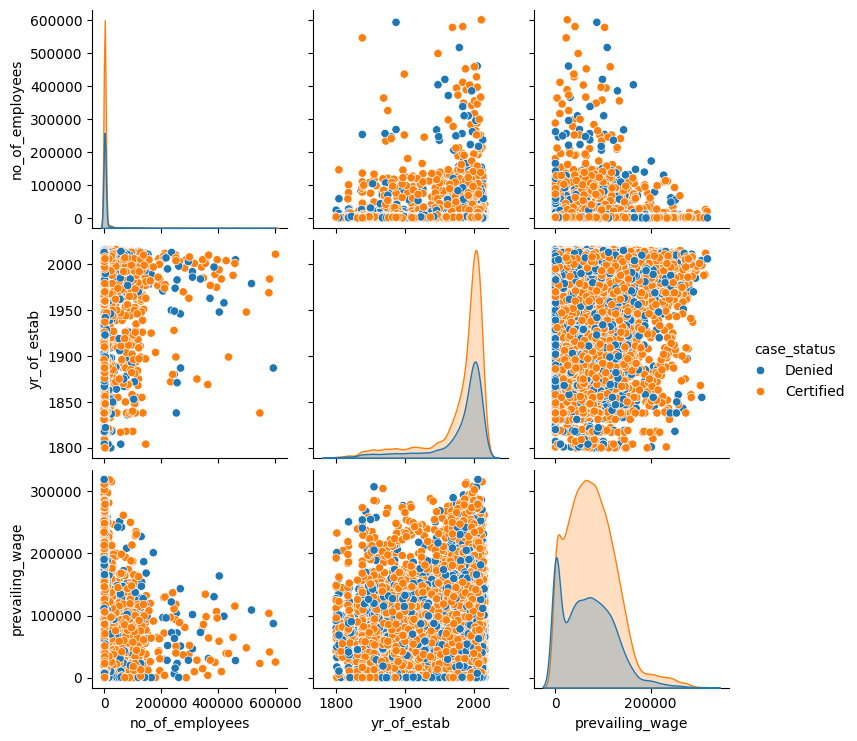

In [29]:
sns.pairplot(data, hue="case_status")

## Data Pre-processing

### Outlier Check

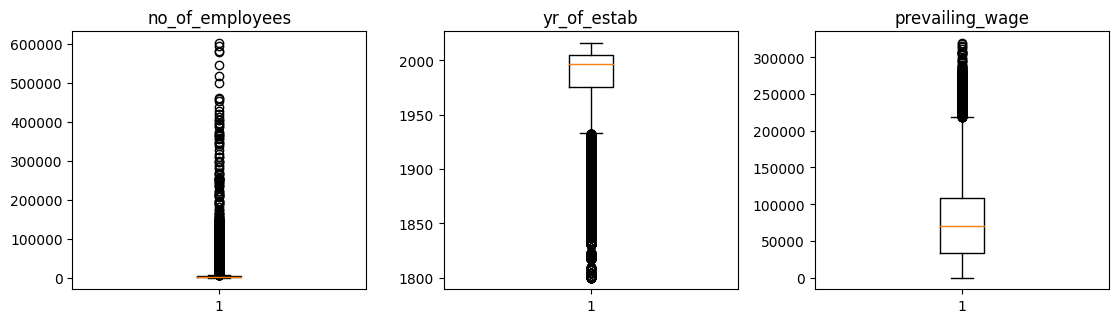

In [30]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [31]:
data[data["no_of_employees"]<=10000]["case_status"].count()/data["case_status"].count()

0.9436420722135008

In [32]:
#for no_of_employees since 94% of cases have values less than 10000, we can consider 10000 as the threshold for outliers by clipping the values
percent_hi = data['no_of_employees'].quantile(0.95)
percent_low = data['no_of_employees'].quantile(0.05)
data['no_of_employees__capped'] = data['no_of_employees'].clip(lower=percent_low, upper=percent_hi)

#we will do the same for prevailing_wage and yrs_of_establishment
data['prevailing_wage__capped'] = data['prevailing_wage'].clip(lower=percent_low, upper=percent_hi)
data['yr_of_estab__capped'] = data['yr_of_estab'].clip(lower=percent_low, upper=percent_hi)

In [33]:
data

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,no_of_employees__capped,prevailing_wage__capped,yr_of_estab__capped
0,Asia,High School,N,N,14513,2007,West,592.203,Hour,Y,Denied,14083,592.203,2007
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.650,Year,Y,Certified,2412,14083.000,2002
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.860,Year,Y,Denied,14083,14083.000,2008
3,Asia,Bachelor's,N,N,98,1897,West,83434.030,Year,Y,Denied,209,14083.000,1897
4,Africa,Master's,Y,N,1082,2005,South,149907.390,Year,Y,Certified,1082,14083.000,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,Asia,Bachelor's,Y,Y,2601,2008,South,77092.570,Year,Y,Certified,2601,14083.000,2008
25476,Asia,High School,Y,N,3274,2006,Northeast,279174.790,Year,Y,Certified,3274,14083.000,2006
25477,Asia,Master's,Y,N,1121,1910,South,146298.850,Year,N,Certified,1121,14083.000,1910
25478,Asia,Master's,Y,Y,1918,1887,West,86154.770,Year,Y,Certified,1918,14083.000,1887


### Data Preparation for modeling

In [34]:
#turn all cataegorical variables into dummies using pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

oneHotEncoder = OneHotEncoder()

# Define which columns to one-hot encode
columns_to_hotencode = ["continent","education_of_employee","has_job_experience","requires_job_training","region_of_employment","unit_of_wage", "full_time_position"]
columns_to_catalog = ["case_status"]

# Create a transformer for categorical features
categorical_onehottransformer = Pipeline(steps=[
    ('encoder', OrdinalEncoder()), # Convert to categorical type
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # Apply one-hot encoding
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OrdinalEncoder()), # Convert to categorical type
])


# Create preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('catonehot', categorical_onehottransformer, columns_to_hotencode),
        ('cat', categorical_transformer, columns_to_catalog)
    ],
    remainder='passthrough'  # Include other columns without transformation
)

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
transformed_data = pipeline.fit_transform(data)

# Create a new DataFrame with transformed data
transformed_df = pd.DataFrame(transformed_data, 
                            columns = pipeline.get_feature_names_out())

In [35]:
transformed_df.head(10)

,catonehot__continent_0.0,catonehot__continent_1.0,catonehot__continent_2.0,catonehot__continent_3.0,catonehot__continent_4.0,catonehot__continent_5.0,catonehot__education_of_employee_0.0,catonehot__education_of_employee_1.0,catonehot__education_of_employee_2.0,catonehot__education_of_employee_3.0,catonehot__has_job_experience_0.0,catonehot__has_job_experience_1.0,catonehot__requires_job_training_0.0,catonehot__requires_job_training_1.0,catonehot__region_of_employment_0.0,catonehot__region_of_employment_1.0,catonehot__region_of_employment_2.0,catonehot__region_of_employment_3.0,catonehot__region_of_employment_4.0,catonehot__unit_of_wage_0.0,catonehot__unit_of_wage_1.0,catonehot__unit_of_wage_2.0,catonehot__unit_of_wage_3.0,catonehot__full_time_position_0.0,catonehot__full_time_position_1.0,cat__case_status,remainder__no_of_employees,remainder__yr_of_estab,remainder__prevailing_wage,remainder__no_of_employees__capped,remainder__prevailing_wage__capped,remainder__yr_of_estab__capped
0,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,14513.000,2007.000,592.203,14083.000,592.203,2007.000
1,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,2412.000,2002.000,83425.650,2412.000,14083.000,2002.000
2,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,44444.000,2008.000,122996.860,14083.000,14083.000,2008.000
3,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,98.000,1897.000,83434.030,209.000,14083.000,1897.000
4,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1082.000,2005.000,149907.390,1082.000,14083.000,2005.000
5,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,2339.000,2012.000,78252.140,2339.000,14083.000,2012.000
6,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,4985.000,1994.000,53635.390,4985.000,14083.000,1994.000
7,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,3035.000,1924.000,418.230,3035.000,418.230,1924.000
8,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,4810.000,2012.000,74362.190,4810.000,14083.000,2012.000
9,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,2251.000,1995.000,67514.760,2251.000,14083.000,1995.000


In [36]:
X = transformed_df.drop("cat__case_status", axis=1)
y=transformed_df["cat__case_status"]    

In [37]:
#get training/val and test data setup
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#set training set and validation set data aside
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.25, random_state=1, stratify=y_trainval
)
print(X_train.shape, X_val.shape, X_test.shape)


(15288, 31) (5096, 31) (5096, 31)


## Model Building

### Model Evaluation Criterion

In [38]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [39]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Defining scorer to be used for cross-validation and hyperparameter tuning

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Model building with original data

In [50]:
def train_validate(X_train, y_train, X_val, y_val):
    models = []  # Empty list to store all the models

    # Appending models into the list
    models.append(("Bagging", BaggingClassifier(random_state=1)))
    models.append(("Random forest", RandomForestClassifier(random_state=1)))
    models.append(("GBM", GradientBoostingClassifier(random_state=1)))
    models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
    models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
    models.append(("dtree", DecisionTreeClassifier(random_state=1)))

    results = []  # Empty list to store all model's CV scores
    names = []  # Empty list to store name of the models
    score = []
    # loop through all models to get the mean cross validated score
    print("\n" "Cross-Validation Performance:" "\n")
    for name, model in models:
        scoring = "recall"
        kfold = StratifiedKFold(
            n_splits=5, shuffle=True, random_state=1
        )  # Setting number of splits equal to 5
        cv_result = cross_val_score(
            estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
        )
        results.append(cv_result)
        names.append(name)
        print("{}: {}".format(name, cv_result.mean() * 100))

    print("\n" "Validation Performance:" "\n")

    for name, model in models:
        model.fit(X_train, y_train)
        scores = recall_score(y_val, model.predict(X_val))
        score.append(scores)
        print("{}: {}".format(name, scores))

In [51]:
train_validate(X_train, y_train, X_val, y_val)


Cross-Validation Performance:

Bagging: 41.73748109072572
Random forest: 47.705383809782404
GBM: 48.59171482874986
Adaboost: 42.761122532097275
Xgboost: 46.956789884023124
dtree: 49.37940731546489

Validation Performance:

Bagging: 0.4477259303012404
Random forest: 0.49616066154754873
GBM: 0.5050206733608978
Adaboost: 0.4370939161252215
Xgboost: 0.49734199645599525
dtree: 0.5062020082693444


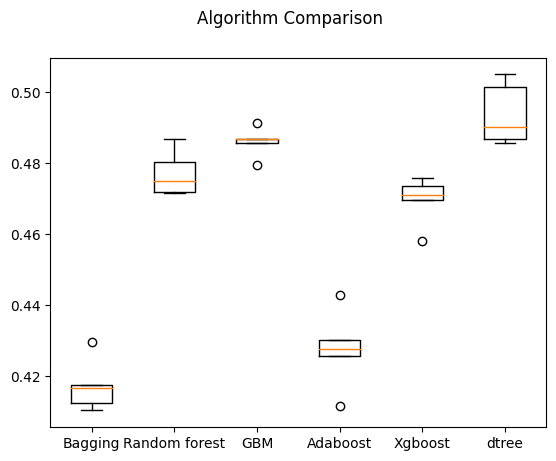

In [41]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

### Model Building with oversampled data

In [42]:
num_postive_classes = transformed_df[transformed_df["cat__case_status"]==1]['catonehot__continent_0.0'].count()
num_negative_classes = transformed_df[transformed_df["cat__case_status"]==0]['catonehot__continent_0.0'].count()
print(f'positive # of classes: {num_postive_classes}')
print(f'negative # of classes: {num_negative_classes}')



positive # of classes: 8462
negative # of classes: 17018


In [ ]:
sm = SMOTE(sampling_strategy=0.6, k_neighbors=5, random_state=1) 
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [52]:
train_validate(X_train_over, y_train_over, X_val, y_val)


Cross-Validation Performance:

Bagging: 52.87301661284415
Random forest: 56.88846422745281
GBM: 58.79866830908546
Adaboost: 53.8686420081899
Xgboost: 56.82335785864101
dtree: 56.93735060092553

Validation Performance:

Bagging: 0.45067926757235677
Random forest: 0.4985233313644418
GBM: 0.5221500295333728
Adaboost: 0.4731246308328411
Xgboost: 0.5085646780862374
dtree: 0.49556999409332547


From the oversampling, although the training performed better but the valiation performance stayed the same.  This means oversampling didn't help.

### Model Building with undersampled data

In [54]:
rus = RandomUnderSampler(sampling_strategy=1, random_state=1)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

In [55]:
train_validate(X_train_under, y_train_under, X_val, y_val)


Cross-Validation Performance:

Bagging: 62.06469880920057
Random forest: 68.26903533610023
GBM: 69.35268220782747
Adaboost: 66.81179938714557
Xgboost: 68.5644078972887
dtree: 62.37909700942554

Validation Performance:

Bagging: 0.629060838747785
Random forest: 0.6910809214412286
GBM: 0.7052569403425871
Adaboost: 0.6863555818074424
Xgboost: 0.6910809214412286
dtree: 0.6361488481984643


Undersampling is performing much better than the oversampling as both training and validation performance have improved substantially.

## Hyperparameter Tuning

### Tuning AdaBoost using oversampled data

In [66]:
aboost = AdaBoostClassifier(random_state=1)
params = {
    "n_estimators": [50, 100, 200, 300],
    "learning_rate": [0.01, 0.1, 1],
}

grid_search = GridSearchCV(estimator=aboost, param_grid=params, scoring="recall", cv=5)
grid_search.fit(X_train_over, y_train_over)
print(
    "Best parameters are {} with CV score={}:".format(
        grid_search.best_params_, grid_search.best_score_
    )
)
tunedAboost = grid_search.best_estimator_


Best parameters are {'learning_rate': 0.1, 'n_estimators': 300} with CV score=0.46148110663514996:


### Tuning Random forest using undersampled data

In [60]:
rf = RandomForestClassifier(random_state=1)
params = {
    "n_estimators": [50, 100, 200, 300],
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 4, 5, None],
    "min_samples_split": [2, 4, 7, 10, 15],
}   
rscv = RandomizedSearchCV(estimator=rf, param_distributions=params, scoring="recall", cv=5)
rscv.fit(X_train_under, y_train_under)   
print(
    "Best parameters are {} with CV score={}:".format(
        rscv.best_params_, rscv.best_score_
    )
)
tunedRf = rscv.best_estimator_

Best parameters are {'n_estimators': 50, 'min_samples_split': 10, 'max_depth': None, 'criterion': 'entropy'} with CV score=0.6897771614755053:


### Tuning with Gradient boosting with oversampled data

In [61]:
bgm = BaggingClassifier(random_state=1)
params = {
    "n_estimators": [50, 100, 200, 300],
    "max_samples": [0.5, 1.0],
    "max_features": [0.5, 1.0],
}
rscv = RandomizedSearchCV(estimator=bgm, param_distributions=params, scoring="recall", cv=5)
rscv.fit(X_train_over, y_train_over)  
print(
    "Best parameters are {} with CV score={}:".format(
        rscv.best_params_, rscv.best_score_
    )
)
tunedBgm = rscv.best_estimator_

Best parameters are {'n_estimators': 300, 'max_samples': 1.0, 'max_features': 1.0} with CV score=0.5409827878949296:


### Tuning XGBoost using oversampled data

In [62]:
xgb = XGBClassifier(random_state=1, eval_metric="logloss") 
params = {
    "n_estimators": [50, 100, 200, 300],
    "learning_rate": [0.01, 0.1, 1],
    "max_depth": [3, 4, 5, 6, 7],
    "subsample": [0.5, 0.7, 1],
    "colsample_bytree": [0.5, 0.7, 1],
}   
rscv = RandomizedSearchCV(estimator=xgb, param_distributions=params, scoring="recall", cv=5)
rscv.fit(X_train_over, y_train_over)    
print(
    "Best parameters are {} with CV score={}:".format(
        rscv.best_params_, rscv.best_score_
    )
)
tunedxgb = rscv.best_estimator_


Best parameters are {'subsample': 0.5, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 1, 'colsample_bytree': 1} with CV score=0.4683305256849885:


**We have now tuned all the models, let's compare the performance of all tuned models and see which one is the best.**

## Model performance comparison and choosing the final model

In [74]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf  

In [77]:
adaboost_grid_train = model_performance_classification_sklearn(
    tunedAboost, X_val, y_val
)
bgm_random_train = model_performance_classification_sklearn(
    tunedBgm, X_val, y_val
)
rf_random_train = model_performance_classification_sklearn(
    tunedRf, X_val, y_val
)
xgboost_random_train = model_performance_classification_sklearn(
    tunedxgb, X_val, y_val
)


In [78]:
models_train_comp_df = pd.concat(
    [
        adaboost_grid_train.T,
        bgm_random_train.T,
        rf_random_train.T,
        xgboost_random_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "AdaboostTuned with Grid search",
    "BGM tuned with Random search",
    "Random Forest tuned with Random search",
    "Xgboost Tuned with Random Search",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,AdaboostTuned with Grid search,BGM tuned with Random search,Random Forest tuned with Random search,Xgboost Tuned with Random Search
Accuracy,0.744,0.732,0.704,0.668
Recall,0.468,0.509,0.694,0.493
Precision,0.663,0.618,0.543,0.500
F1,0.549,0.558,0.609,0.497


Based on comparision above, the Random Forest tuned model using Random Search(with hyperparameter of: 'n_estimators': 50, 'min_samples_split': 10, 'max_depth': None, 'criterion': 'entropy') is the best model with highest recall value and F1 score.  

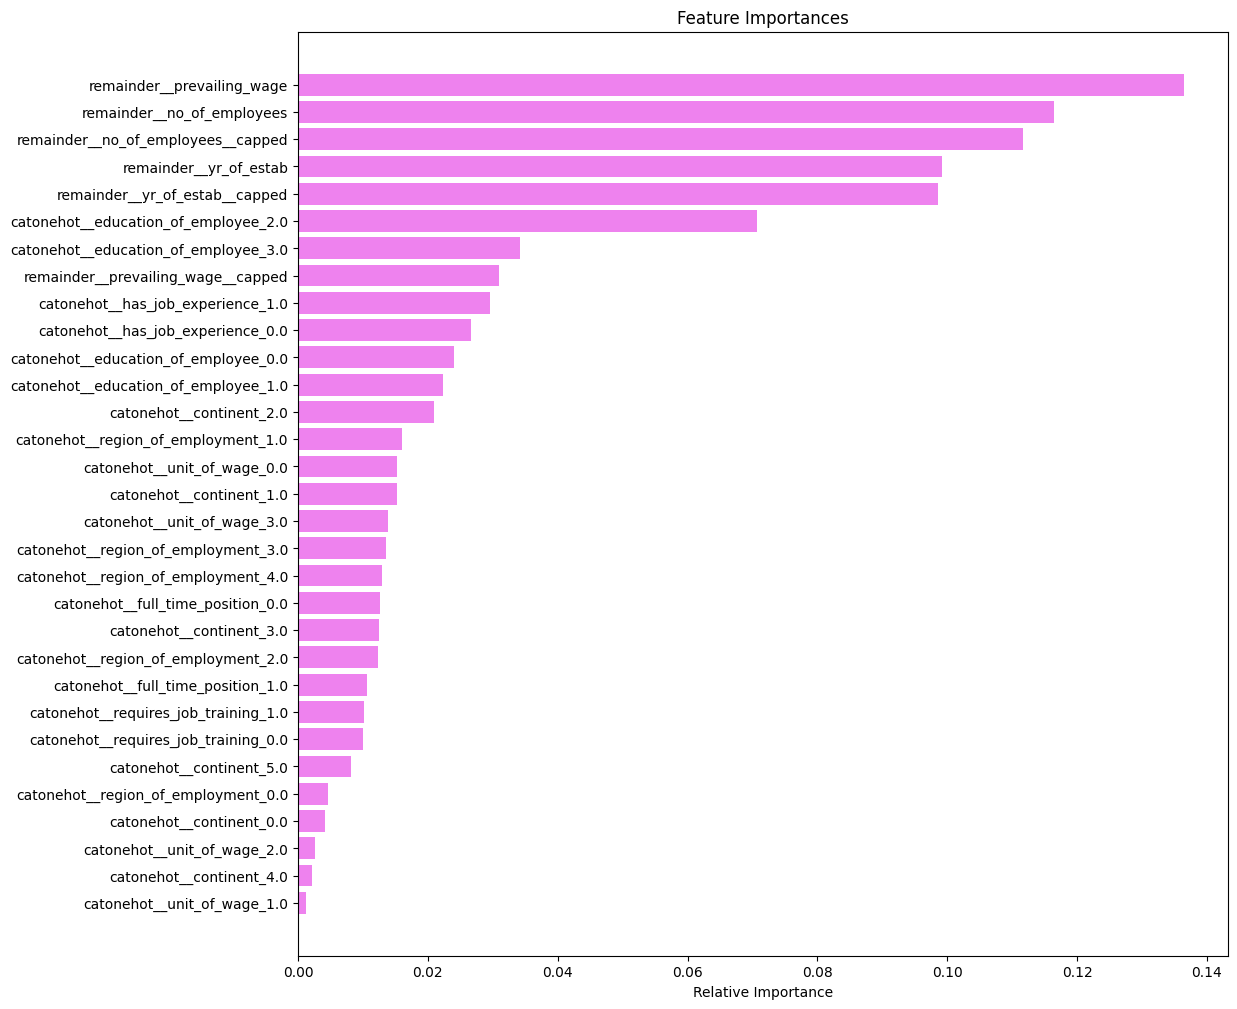

In [79]:
feature_names = X_train.columns
importances = tunedRf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [88]:
feature_names = X_train.columns
for name in feature_names:
    print (f'{name.replace("catonehot__","").replace("cat__","").replace("_"," ")}')


continent 0.0
continent 1.0
continent 2.0
continent 3.0
continent 4.0
continent 5.0
education of employee 0.0
education of employee 1.0
education of employee 2.0
education of employee 3.0
has job experience 0.0
has job experience 1.0
requires job training 0.0
requires job training 1.0
region of employment 0.0
region of employment 1.0
region of employment 2.0
region of employment 3.0
region of employment 4.0
unit of wage 0.0
unit of wage 1.0
unit of wage 2.0
unit of wage 3.0
full time position 0.0
full time position 1.0
remainder  no of employees
remainder  yr of estab
remainder  prevailing wage
remainder  no of employees  capped
remainder  prevailing wage  capped
remainder  yr of estab  capped


In [80]:

def get_original_feature_importance(model, feature_names, original_columns):
    """
    Map one-hot encoded feature importances back to original columns
    
    Parameters:
    model: fitted model with feature_importances_ attribute
    feature_names: list of one-hot encoded column names
    original_columns: list of original column names before encoding
    """
    # Get feature importances
    importances = model.feature_importances_
    
    # Create dictionary to store summed importances
    original_importances = {}
    
    # Iterate through original columns
    for col in original_columns:
        # Sum importance of all one-hot columns that came from this original column
        importance_sum = sum(
            importance 
            for feature, importance in zip(feature_names, importances)
            if col in feature  # Check if original column name is in feature name
        )
        original_importances[col] = importance_sum
    
    # Convert to Series
    return pd.Series(original_importances).sort_values(ascending=False)



In [ ]:
# Example usage:
"""
Let's say your original columns were ['color', 'size'] 
and after one-hot encoding you got ['color_red', 'color_blue', 'size_small', 'size_large']
"""

# Assuming you have a fitted random forest model
original_columns = [["continent","education_of_employee","has_job_experience","requires_job_training","region_of_employment","unit_of_wage", "full_time_position", "no_of_employees", "yr_of_estab", "prevailing_wage"]]    
encoded_features = ['catonehot__continent_0.0', 'catonehot__continent_1.0',
       'catonehot__continent_2.0', 'catonehot__continent_3.0',
       'catonehot__continent_4.0', 'catonehot__continent_5.0',
       'catonehot__education_of_employee_0.0',
       'catonehot__education_of_employee_1.0',
       'catonehot__education_of_employee_2.0',
       'catonehot__education_of_employee_3.0',
       'catonehot__has_job_experience_0.0',
       'catonehot__has_job_experience_1.0',
       'catonehot__requires_job_training_0.0',
       'catonehot__requires_job_training_1.0',
       'catonehot__region_of_employment_0.0',
       'catonehot__region_of_employment_1.0',
       'catonehot__region_of_employment_2.0',
       'catonehot__region_of_employment_3.0',
       'catonehot__region_of_employment_4.0', 'catonehot__unit_of_wage_0.0',
       'catonehot__unit_of_wage_1.0', 'catonehot__unit_of_wage_2.0',
       'catonehot__unit_of_wage_3.0', 'catonehot__full_time_position_0.0',
       'catonehot__full_time_position_1.0', 'remainder__no_of_employees',
       'remainder__yr_of_estab', 'remainder__prevailing_wage']

original_importance = get_original_feature_importance(
    tunedRf, 
    encoded_features, 
    original_columns
)

print("Original Feature Importances:")
print(original_importance)

# For plotting
plt.figure(figsize=(10, 6))
original_importance.plot(kind='bar')
plt.title('Feature Importance (Original Columns)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

TypeError: 'in <string>' requires string as left operand, not list

## Actionable Insights and Recommendations

<font size=6 color='blue'>Power Ahead</font>
___